## K-Means Clusterization Using K-Modes 

New York State allows its residents to seek public mental health services on behalf of the state. Those who were treated within a one-week period in 2019 completed The Patients Characteristics Survey (PCS). 

In order to better understand the patients who seek public mental health, the survey was analyzed using various machine learning algorithms. 

The examination of the patients’ sex, age, mental health illness, chronic illness, substance abuse statuses can determine criminal justice outcomes. 

In simpler terms, the predictive models can identify who is likely to have a criminal justice record and who were not based on mental health attributes.

Data: https://data.ny.gov/Human-Services/Patient-Characteristics-Survey-PCS-2019/urn3-ezfe


### Contents 

#### Preprocessing

#### Elbow Method
Used to identify the amount of clusters within the PCS dataframe. 

#### K-Means Clustering 
Five clusters were awknowleged and described by the algorithm.

Patients with similar characteristics were clustered together. 

## Preprocessing 

In [1]:
import pandas as pd
data = pd.read_csv("Patient_Characteristics_Survey__PCS___2019.csv")
pd.set_option('display.max_columns', None)
data.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,Preferred Language,Religious Preference,Veteran Status,Employment Status,Number Of Hours Worked Each Week,Education Status,Special Education Services,Mental Illness,Intellectual Disability,Autism Spectrum,Other Developmental Disability,Alcohol Related Disorder,Drug Substance Disorder,Opioid Related Disorder,Mobility Impairment Disorder,Hearing Impairment,Visual Impairment,Speech Impairment,Hyperlipidemia,High Blood Pressure,Diabetes,Obesity,Heart Attack,Stroke,Other Cardiac,Pulmonary Asthma,Alzheimer or Dementia,Kidney Disease,Liver Disease,Endocrine Condition,Neurological Condition,Traumatic Brain Injury,Joint Disease,Cancer,Other Chronic Med Condition,No Chronic Med Condition,Unknown Chronic Med Condition,Cannabis Recreational Use,Cannabis Medicinal Use,Smokes,Received Smoking Medication,Received Smoking Counseling,Serious Mental Illness,Alcohol 12m Service,Opioid 12m Service,Drug/Substance 12m Service,Principal Diagnosis Class,Additional Diagnosis Class,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits,Medicaid and Medicare Insurance,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2019,OUTPATIENT,LONG ISLAND REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,DATA NOT AVAILABLE,NO,EMPLOYED,35 HOURS OR MORE,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,False,YES,NO,NO,NO,NO,YES,NO,NO,NO,MENTAL ILLNESS,MENTAL ILLNESS,NO,NO,NO,NO,NO,NO,NO,NO,False,NO,NOT APPLICABLE,NO,YES,NO,NO,NO,117
1,2019,OUTPATIENT,HUDSON RIVER REGION,CHILD,FEMALE,"NO, NOT TRANSGENDER",OTHER,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,"I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS",NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,False,YES,NO,YES,NO,NO,YES,NO,NO,NO,MENTAL ILLNESS,MENTAL ILLNESS,NO,NO,NO,NO,NO,NO,NO,NO,False,NO,NOT APPLICABLE,NO,YES,YES,NO,NO,120
2,2019,SUPPORT,WESTERN REGION,ADULT,FEMALE,"YES, TRANSGENDER",LESBIAN OR GAY,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,ENGLISH,I BELONG TO A FORMAL RELIGIOUS GROUP,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,SOME COLLEGE,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,False,NO,NO,NO,NO,NO,YES,NO,NO,NO,MENTAL ILLNESS,NOT MI - OTHER,NO,YES,NO,NO,NO,NO,YES,NO,False,YES,YES,YES,NO,NO,NO,YES,999
3,2019,OUTPATIENT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,I BELONG TO A FORMAL RELIGIOUS GROUP,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,SOME COLLEGE,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,False,NO,NO,NO,NO,NO,YES,NO,NO,NO,MENTAL ILLNESS,NO ADDITIONAL DIAGNOSIS,NO,NO,NO,NO,NO,NO,NO,NO,False,YES,UNKNOWN,NO,NO,NO,NO,NO,147
4,2019,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,ENGLISH,"I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS",NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO

In [2]:
def f(row):
    if row['Hyperlipidemia'] == "YES" or row['High Blood Pressure'] == "YES" or row['Diabetes'] == "YES" or row['Obesity'] == "YES" or row['Heart Attack']	== "YES" or row['Stroke']	== "YES" or row['Other Cardiac'] == "YES" or row['Pulmonary Asthma']	== "YES" or row['Alzheimer or Dementia'] == "YES" or row['Kidney Disease'] == "YES" or row['Liver Disease'] == "YES" or row['Endocrine Condition'] == "YES" or row['Neurological Condition'] == "YES" or row['Traumatic Brain Injury'] == "YES" or row['Joint Disease'] == "YES" or row['Cancer']	== "YES" or row['Other Chronic Med Condition'] == "YES": 
        val = "YES"
    elif row['Hyperlipidemia'] == "NO":
        val = 'NO'
    else:
        val = 'Unknown'
    return val

#create new column 'Chronic Illness' using the function above
data['Chronic Illness'] = data.apply(f, axis=1)

In [3]:
def f(row):
    if row['Alcohol Related Disorder'] == "YES" or row['Drug Substance Disorder'] == "YES" or row['Opioid Related Disorder'] == "YES":
        val = 'YES'
    elif row['Alcohol Related Disorder'] == "NO":
        val = 'NO'
    else:
        val = 'Unknown'
    return val

#create new column 'Substance Abuse' using the function above
data['Substance Abuse'] = data.apply(f, axis=1)

In [4]:
df = pd.DataFrame(data, columns=['Age Group', 'Sex', 'Chronic Illness', 'Substance Abuse','Mental Illness','Criminal Justice Status'])
df

,Age Group,Sex,Chronic Illness,Substance Abuse,Mental Illness,Criminal Justice Status
0,ADULT,FEMALE,NO,NO,YES,NO
1,CHILD,FEMALE,YES,NO,YES,NO
2,ADULT,FEMALE,YES,NO,YES,YES
3,ADULT,FEMALE,NO,NO,YES,NO
4,ADULT,FEMALE,YES,NO,YES,NO
...,...,...,...,...,...,...
196097,ADULT,FEMALE,YES,NO,YES,NO
196098,ADULT,MALE,YES,NO,YES,NO
196099,ADULT,MALE,NO,NO,YES,NO
196100,CHILD,FEMALE,NO,NO,YES,NO


In [5]:
df.isnull().sum()

Age Group                  0
Sex                        0
Chronic Illness            0
Substance Abuse            0
Mental Illness             0
Criminal Justice Status    0
dtype: int64

## K-Means Clustering Using K-Modes

In [6]:
df = df.drop(['Criminal Justice Status'], axis=1)
df.head()

,Age Group,Sex,Chronic Illness,Substance Abuse,Mental Illness
0,ADULT,FEMALE,NO,NO,YES
1,CHILD,FEMALE,YES,NO,YES
2,ADULT,FEMALE,YES,NO,YES
3,ADULT,FEMALE,NO,NO,YES
4,ADULT,FEMALE,YES,NO,YES


In [7]:
from kmodes.kmodes import KModes
kproto = KModes(n_clusters=5)
clusters = kproto.fit_predict(df, categorical=[1,2,3,4,5])

In [8]:
dfWithLabels = pd.concat((df, pd.DataFrame(clusters)), axis =1)
dfWithLabels.set_axis(['Age Group', 'Sex', 'Chronic Illness', 'Substance Abuse','Mental Illness','clusters'], axis=1, inplace=True)

dfWithLabels.head()

,Age Group,Sex,Chronic Illness,Substance Abuse,Mental Illness,clusters
0,ADULT,FEMALE,NO,NO,YES,0
1,CHILD,FEMALE,YES,NO,YES,0
2,ADULT,FEMALE,YES,NO,YES,0
3,ADULT,FEMALE,NO,NO,YES,0
4,ADULT,FEMALE,YES,NO,YES,0


In [9]:
dfWithBinary = pd.get_dummies(df, columns=['Age Group', 'Sex', 'Chronic Illness', 'Substance Abuse','Mental Illness'])
dfWithBinary.head()

,Age Group_ADULT,Age Group_CHILD,Age Group_UNKNOWN,Sex_FEMALE,Sex_MALE,Sex_UNKNOWN,Chronic Illness_NO,Chronic Illness_Unknown,Chronic Illness_YES,Substance Abuse_NO,Substance Abuse_Unknown,Substance Abuse_YES,Mental Illness_NO,Mental Illness_UNKNOWN,Mental Illness_YES
0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1
3,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1


In [10]:
import sklearn.cluster
from sklearn.cluster import KMeans
import numpy as np

k_means = KMeans(n_clusters=5, max_iter=50, random_state=1)
k_means.fit(dfWithBinary)
labels = k_means.labels_

dfWithLabels = pd.concat((df, pd.DataFrame(labels)), axis =1)
dfWithLabels.set_axis(['Age Group', 'Sex', 'Chronic Illness', 'Substance Abuse','Mental Illness','clusters'], axis=1, inplace=True)
pd.set_option('display.max_rows', None)
dfWithLabels.head()

,Age Group,Sex,Chronic Illness,Substance Abuse,Mental Illness,clusters
0,ADULT,FEMALE,NO,NO,YES,3
1,CHILD,FEMALE,YES,NO,YES,1
2,ADULT,FEMALE,YES,NO,YES,1
3,ADULT,FEMALE,NO,NO,YES,3
4,ADULT,FEMALE,YES,NO,YES,1


### Elbow Method (wcss)

In [11]:
k_means.inertia_

144306.03689889752

In [12]:
wcss = []

for i in range (1,15):
    k_means = KMeans(i)
    k_means.fit(dfWithBinary)
    wcss_iter = k_means.inertia_
    wcss.append(wcss_iter)
wcss

[367899.6474793458,
 268610.44069458416,
 208527.11220512792,
 175153.36186106518,
 144306.03689889752,
 121895.81365608756,
 102810.47493781564,
 85883.4657900872,
 72400.05136455031,
 61332.37625060899,
 55440.12597058771,
 49532.58359718629,
 43203.69663917097,
 39608.45570902782]

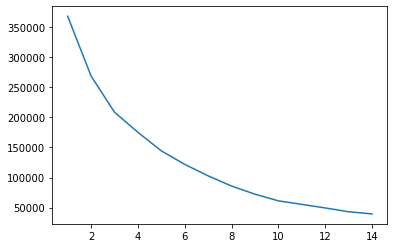

In [13]:
import matplotlib.pyplot as plt
number_cluster = range (1,15)
plt.plot(number_cluster, wcss)

### K-Means Clusters 

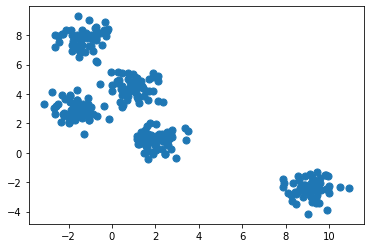

In [14]:
from sklearn.datasets import make_blobs
dfWithBinary, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.60, random_state=0)
plt.scatter(dfWithBinary[:, 0], dfWithBinary[:, 1], s=50);

In [15]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5)
k_means.fit(dfWithBinary)
y_kmeans = k_means.predict(dfWithBinary)

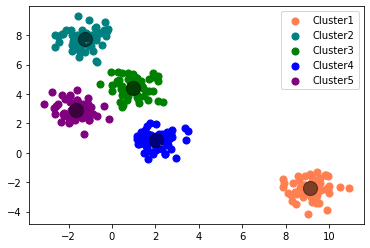

In [19]:
plt.scatter(dfWithBinary[y_kmeans == 0, 0], dfWithBinary[y_kmeans == 0, 1], s = 50, c = 'coral', label = 'Cluster1'),
plt.scatter(dfWithBinary[y_kmeans == 1, 0], dfWithBinary[y_kmeans == 1, 1], s = 50, c = 'teal', label = 'Cluster2'),
plt.scatter(dfWithBinary[y_kmeans == 2, 0], dfWithBinary[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster3'),
plt.scatter(dfWithBinary[y_kmeans == 3, 0], dfWithBinary[y_kmeans == 3, 1], s = 50, c = 'blue', label = 'Cluster4'),
plt.scatter(dfWithBinary[y_kmeans == 4, 0], dfWithBinary[y_kmeans == 4, 1], s = 50, c = 'purple', label = 'Cluster5'), 

centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.legend()
plt.show()